<a href="https://colab.research.google.com/github/Diya221100/Gold-Price-Prediction/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gold Price Prediction Using Machine Learning

***Name: Diya P  
Batch: DST 20823   
Submitted to: [Mr. Kevin Shah](https://www.linkedin.com/in/kevinshah99/)***

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("gold_price.csv", parse_dates=True, index_col='Date')
df.head()

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
Date,,,,,,
2001-01-02,272.80,271.10,183.026,181.617,288.677,287.334
2001-01-03,269.00,267.15,178.916,177.390,281.823,281.655
2001-01-04,268.75,267.10,178.869,178.352,282.538,282.049
2001-01-05,268.00,267.40,178.488,178.148,280.775,280.882
2001-01-08,268.60,268.30,178.769,178.664,282.410,282.481


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4718 entries, 2001-01-02 to 2019-09-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   USD (AM)   4718 non-null   float64
 1   USD (PM)   4682 non-null   float64
 2   GBP (AM)   4718 non-null   float64
 3   GBP (PM)   4682 non-null   float64
 4   EURO (AM)  4718 non-null   float64
 5   EURO (PM)  4682 non-null   float64
dtypes: float64(6)
memory usage: 258.0 KB


In [ ]:
NumericColumn = df.select_dtypes(include='float64').columns
CategoryColumn = df.select_dtypes(include='object').columns

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[NumericColumn] = scaler.fit_transform(df[NumericColumn])


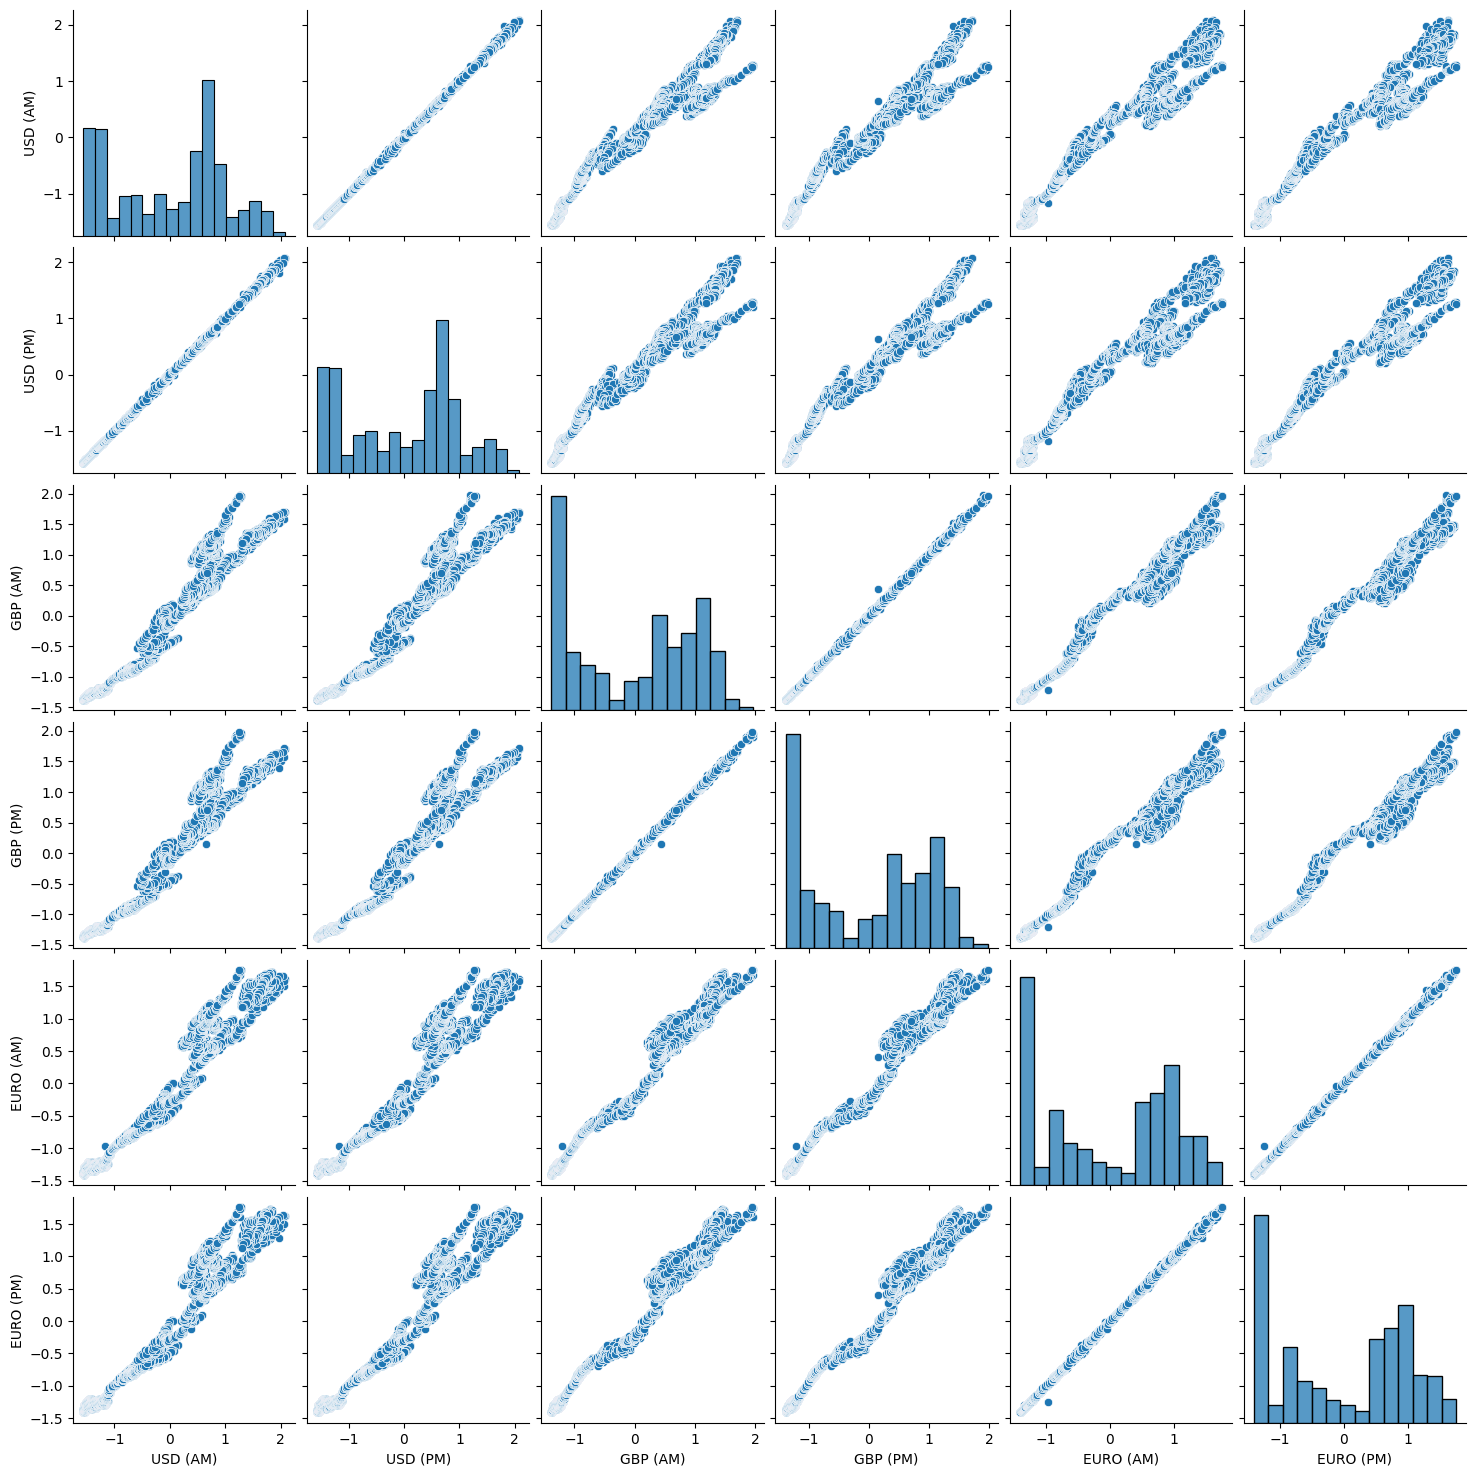

In [ ]:
sns.pairplot(df)

In [ ]:
df['Return'] = df['USD (PM)'].pct_change() * 100
df['Lagged_Return'] = df.Return.shift()

In [ ]:

summary_stats = df.describe()


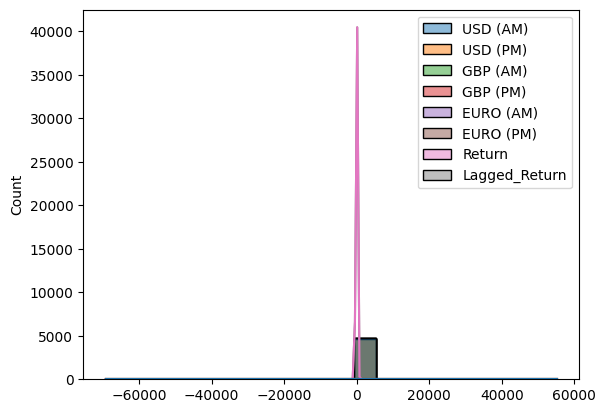

In [ ]:

sns.histplot(df,bins = 20, kde=True)
plt.show()



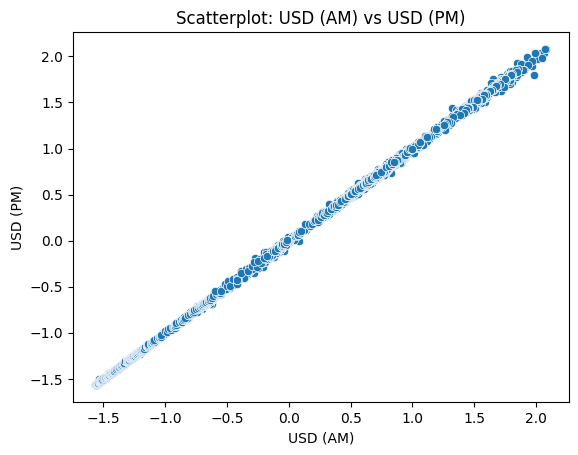

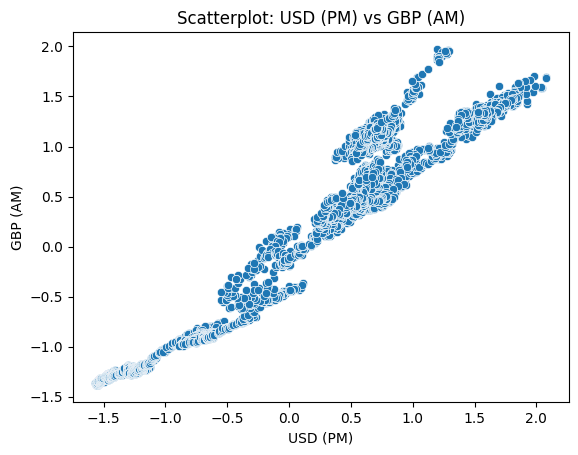

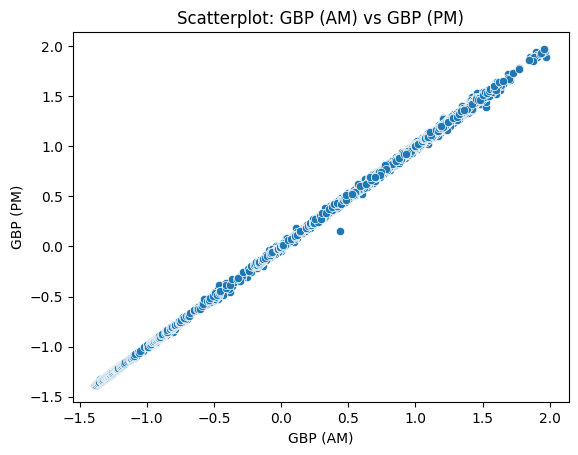

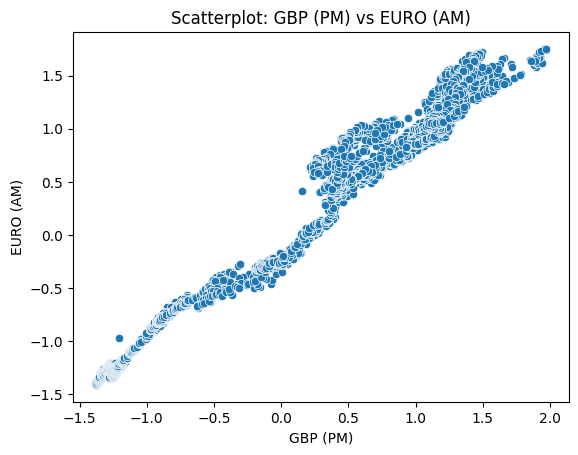

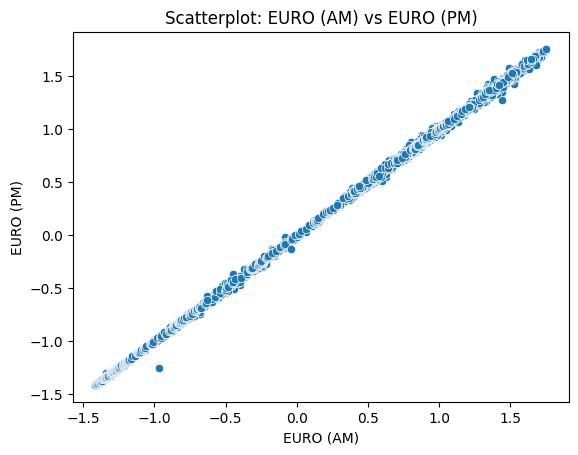

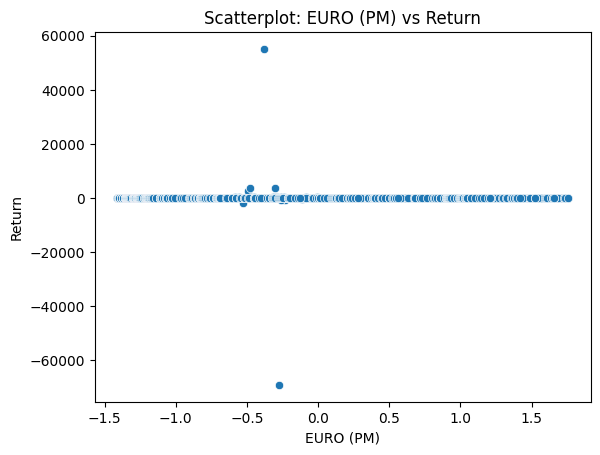

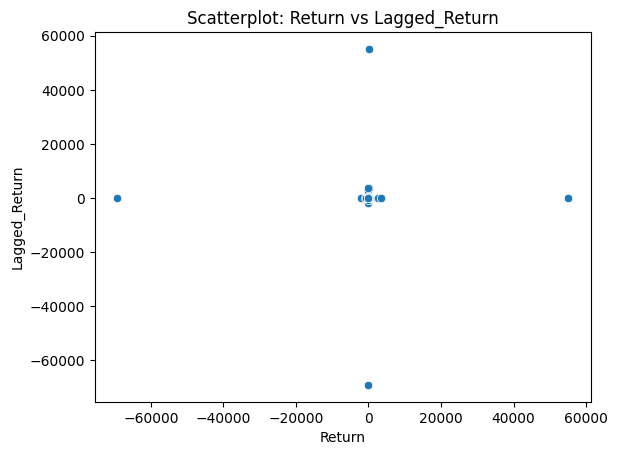

In [ ]:
for i in range(len(df.columns) - 1):
    sns.scatterplot(x=df.iloc[:, i], y=df.iloc[:, i + 1])
    plt.title(f'Scatterplot: {df.columns[i]} vs {df.columns[i + 1]}')
    plt.show()


In [ ]:
df.dropna(inplace=True)
train = df['2001':'2018']
test = df['2019']


In [ ]:
# Create train and test sets for dependent and independent variables
X_train = train["Lagged_Return"].to_frame()
y_train = train["Return"]
X_test = test["Lagged_Return"].to_frame()
y_test = test["Return"]

In [ ]:
mse_score = {}
rsquare_score = {}

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

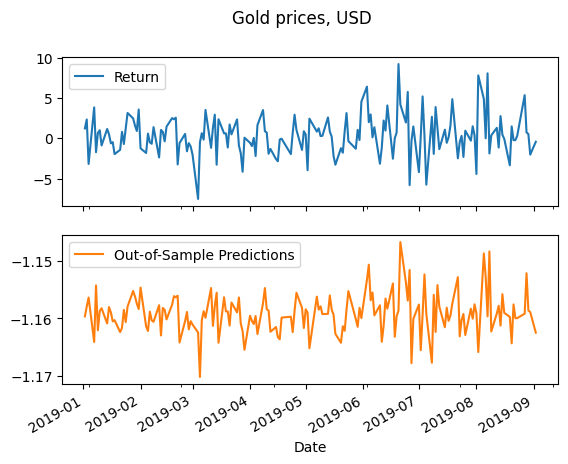

In [ ]:
out_of_sample_results = y_test.to_frame()
# Add a column of "out-of-sample" predictions to that dataframe:
out_of_sample_results["Out-of-Sample Predictions"] = model.predict(X_test)
out_of_sample_results.plot(subplots=True, title='Gold prices, USD')

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Example for Mean Squared Error
mse = mean_squared_error(y_test, predictions)
mse

8.507997292997135

In [ ]:
# Example for R-squared
r2 = r2_score(y_test, predictions)
print(f"R-squared: {r2}")

R-squared: -0.37901357027747573


In [ ]:
mse_score["Linear Regression"] = mse
rsquare_score["Linear Regression"] = r2

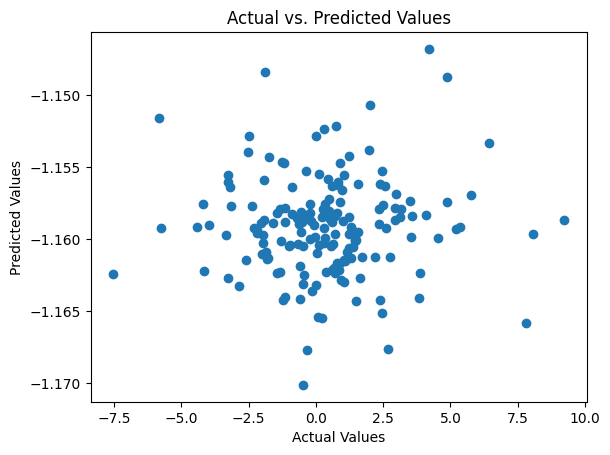

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# For the first continuous target predictor
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)
predictions_dt = model_dt.predict(X_test)


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

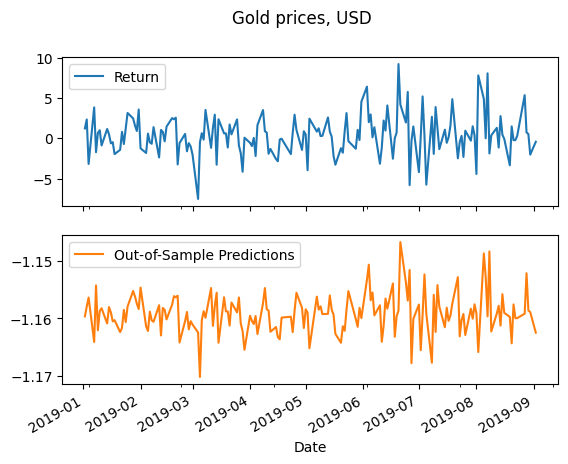

In [ ]:
out_of_sample_results = y_test.to_frame()
# Add a column of "out-of-sample" predictions to that dataframe:
out_of_sample_results["Out-of-Sample Predictions"] = model.predict(X_test)
out_of_sample_results.plot(subplots=True, title='Gold prices, USD')

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Example for Mean Squared Error
mse = mean_squared_error(y_test, predictions)
mse

8.507997292997135

In [ ]:
# Example for R-squared
r2 = r2_score(y_test, predictions)
print(f"R-squared: {r2}")

R-squared: -0.37901357027747573


In [ ]:
mse_score["Decision Tree"] = mse
rsquare_score["Decision Tree"] = r2

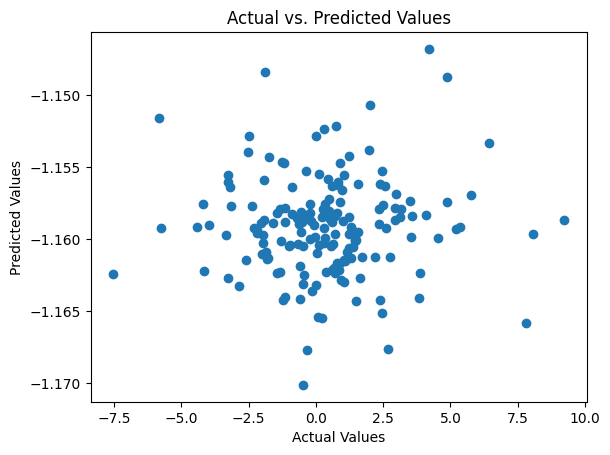

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# For the first continuous target predictor
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
predictions_rf = model_rf.predict(X_test)


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

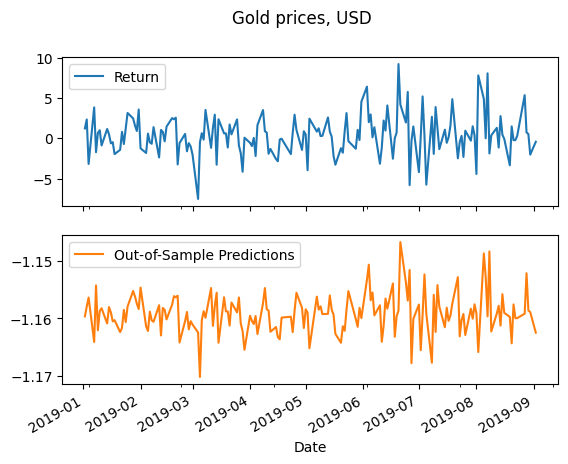

In [ ]:
out_of_sample_results = y_test.to_frame()
# Add a column of "out-of-sample" predictions to that dataframe:
out_of_sample_results["Out-of-Sample Predictions"] = model.predict(X_test)
out_of_sample_results.plot(subplots=True, title='Gold prices, USD')

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Example for Mean Squared Error
mse = mean_squared_error(y_test, predictions)
mse

8.507997292997135

In [ ]:
# Example for R-squared
r2 = r2_score(y_test, predictions)
print(f"R-squared: {r2}")

R-squared: -0.37901357027747573


In [ ]:
mse_score["Random Forest"] = mse
rsquare_score["Random Forest"] = r2

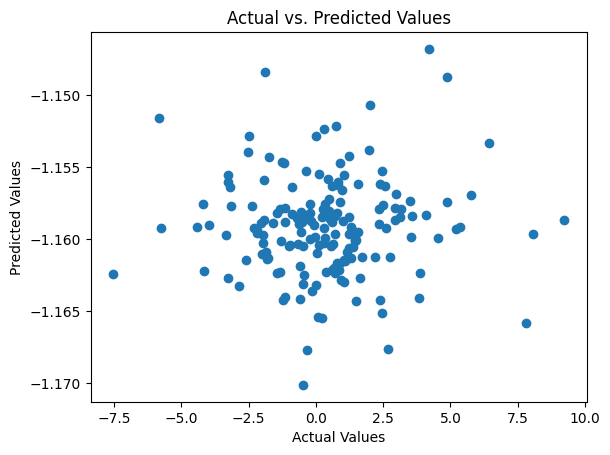

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

In [ ]:
from sklearn.svm import SVR
model_svm = SVR(kernel='linear', C = 5, max_iter=1,verbose=True)  # You can choose different kernels like 'linear', 'rbf', etc.
model_svm.fit(X_train, y_train)
predictions_svm = model_svm.predict(X_test)

[LibSVM]

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

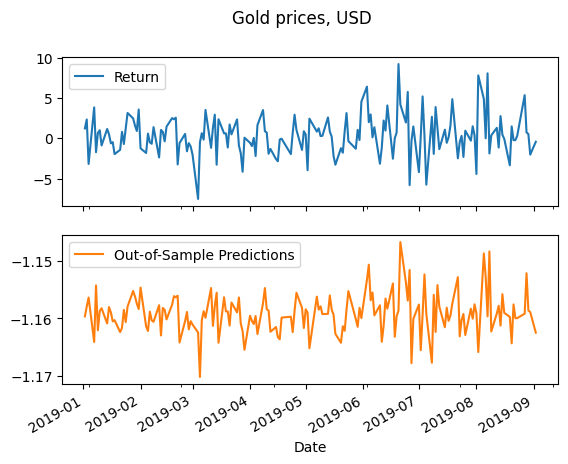

In [ ]:
out_of_sample_results = y_test.to_frame()
# Add a column of "out-of-sample" predictions to that dataframe:
out_of_sample_results["Out-of-Sample Predictions"] = model.predict(X_test)
out_of_sample_results.plot(subplots=True, title='Gold prices, USD')

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Example for Mean Squared Error
mse = mean_squared_error(y_test, predictions)
mse

8.507997292997135

In [ ]:
# Example for R-squared
r2 = r2_score(y_test, predictions)
print(f"R-squared: {r2}")

R-squared: -0.37901357027747573


In [ ]:
mse_score["SVM"] = mse
rsquare_score["SVM"] = r2

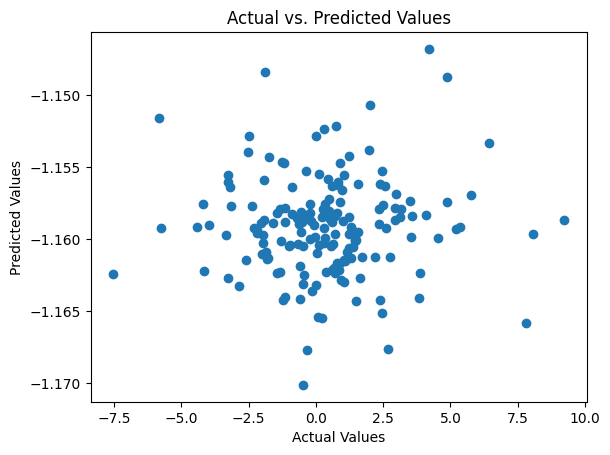

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

In [ ]:
rsquare_score

{'Linear Regression': -0.37901357027747573,
 'Decision Tree': -0.37901357027747573,
 'Random Forest': -0.37901357027747573,
 'SVM': -0.37901357027747573}

In [ ]:
mse_score

{'Linear Regression': 8.507997292997135,
 'Decision Tree': 8.507997292997135,
 'Random Forest': 8.507997292997135,
 'SVM': 8.507997292997135}

<BarContainer object of 4 artists>

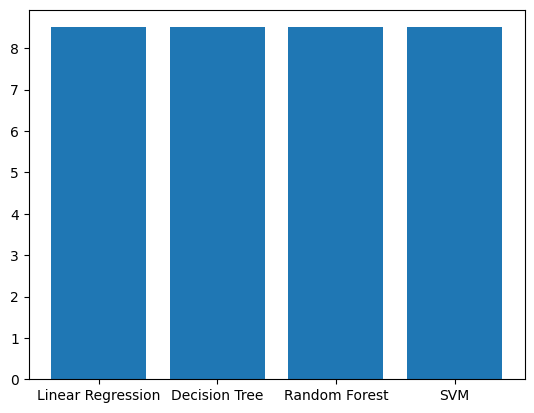

In [ ]:
plt.bar(mse_score.keys(),mse_score.values())

<BarContainer object of 4 artists>

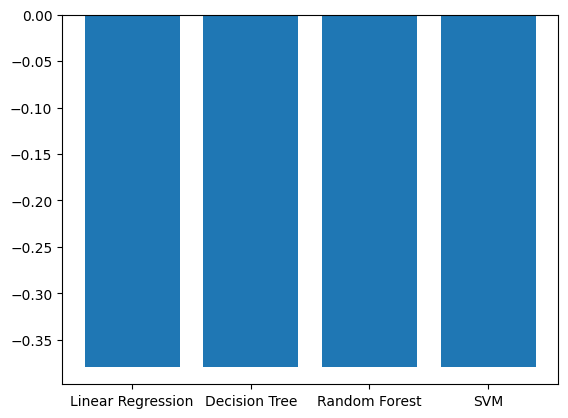

In [ ]:
plt.bar(rsquare_score.keys(),rsquare_score.values())